In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename=r"C:\Users\Teju\OneDrive\Desktop\project\dog.wav"

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

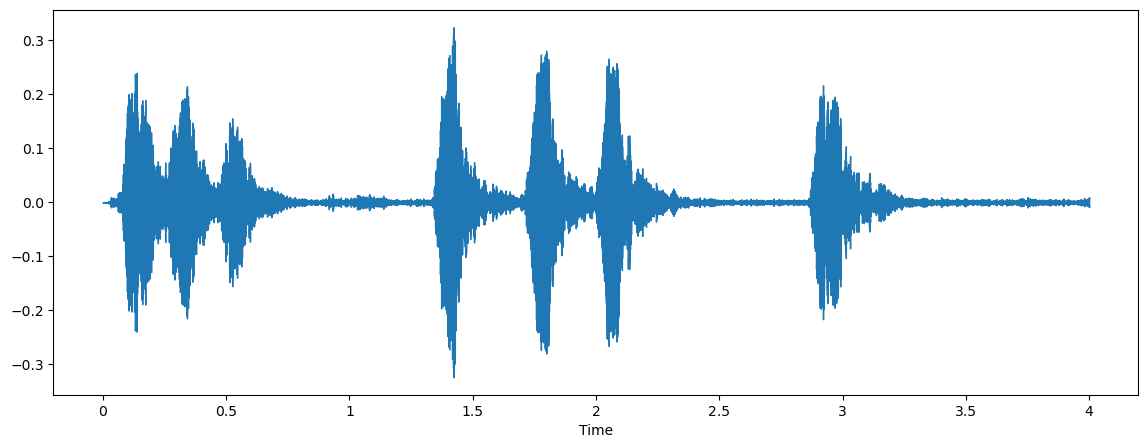

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
plt.show()
ipd.Audio(filename)

In [ ]:
sample_rate

In [ ]:
data

In [ ]:
import pandas as pd
metadata = pd.read_csv(r"C:\Users\Teju\OneDrive\Desktop\project\metadata\UrbanSound8K.csv")
metadata.head(10000)

In [ ]:
import librosa
audio_path_file = r"C:\Users\Teju\OneDrive\Desktop\project\audio\fold4\7389-1-0-3.wav"
librosa_audio_data,librosa_sample_rate = librosa.load(audio_path_file)

In [ ]:
print(librosa_audio_data)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
plt.plot(librosa_audio_data)
plt.show()

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data , sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

In [ ]:
mfccs

In [ ]:
import pandas as pd
import os
import librosa 

audio_dataset_path = r"C:\Users\Teju\OneDrive\Desktop\project\audio"
metadata = pd.read_csv(r"C:\Users\Teju\OneDrive\Desktop\project\metadata\UrbanSound8K.csv")
metadata.head(10000)

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features
    

In [16]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

8326it [21:47, 10.10it/s]F:\Scopy\anaconda\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [21:47, 11.97it/s]F:\Scopy\anaconda\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [22:45,  6.40it/s]


In [17]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [18]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [19]:

X.shape

(8732, 40)

In [20]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [21]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [22]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641270e-01,  7.33490765e-01,  7.11009264e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181704e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:

X_train.shape

(6985, 40)

In [27]:
X_test.shape

(1747, 40)

In [28]:
y_train.shape

(6985, 10)

In [29]:
y_test.shape

(1747, 10)

In [30]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
### No of classes
num_labels=y.shape[1]

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)),  # Adjust input shape
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')  # Adjust according to the number of classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

F:\Scopy\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 17, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289,930 (1.11 MB)

 Trainable params: 289,930 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from datetime import datetime 

# Training Parameters
num_epochs = 150  # Increased epochs for better learning
num_batch_size = 32

# Callbacks
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)

# Training
start = datetime.now()
history = model.fit(
    X_train, y_train, 
    batch_size=num_batch_size, 
    epochs=num_epochs, 
    validation_data=(X_test, y_test), 
    callbacks=[checkpointer, lr_scheduler],  # Removed early_stopping from callbacks
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time:", duration)

Epoch 1/150
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2474 - loss: 3.3584
Epoch 1: val_loss improved from inf to 1.42812, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.2485 - loss: 3.3434 - val_accuracy: 0.5152 - val_loss: 1.4281 - learning_rate: 0.0010
Epoch 2/150
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4537 - loss: 1.5518
Epoch 2: val_loss improved from 1.42812 to 1.15126, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4539 - loss: 1.5515 - val_accuracy: 0.6285 - val_loss: 1.1513 - learning_rate: 0.0010
Epoch 3/150
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5552 - loss: 1.3079
Epoch 3: val_loss improved from 1.15126 to 0.98393, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5552 - loss: 1.3077 - val_accuracy: 0.6898 - val_loss: 0.9839 - learning_ra

In [91]:

test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9313108325004578


In [94]:
import numpy as np

filename = r'C:\Users\Teju\OneDrive\Desktop\project\dog.wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)

# Get prediction
predicted_probabilities = model.predict(prediction_feature)
predicted_class = np.argmax(predicted_probabilities, axis=1)  # Use argmax for multi-class

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Predicted Class: [1]


In [96]:
prediction_feature.shape

(1, 40)

In [98]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.339348  ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.673635  ,  -29.164494  ,  -18.950253  ,
         -2.9579995 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630232  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009955  ,    0.5334609 ,  -23.84339   ,
        -15.267322  ,    9.245734  ,   10.367627  ,   -0.58320117,
         -1.2624055 ,   17.700018  ,   13.847462  ,   -5.1862826 ],
      dtype=float32)

In [100]:
#model.predict_classes(X_test)
predicted_classes = np.argmax(model.predict(X_test), axis=1)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [101]:
import librosa
import numpy as np

filename = r"C:\Users\Teju\OneDrive\Desktop\project\dog.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)

# Reshape for model prediction
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Get predicted class label
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=1)
print(predicted_label)

# Convert label to class name using LabelEncoder
prediction_class = labelencoder.inverse_transform(predicted_label) 
print("Predicted Class:", prediction_class)


[-3.9742188e+02  1.4218434e+02  1.0239104e+01 -9.6230555e+00
 -8.1905851e+00  7.6672630e+00 -1.0299530e+01 -7.1226473e+00
 -3.5969069e+00 -5.6251779e+00 -2.4014688e+00 -3.5109861e+00
  5.2140422e+00  9.1520948e+00  9.7396631e+00  1.2672479e+01
  2.4935958e+00 -1.9596174e-01  2.0568907e+00  1.2565476e-01
  2.3887683e-01 -2.2244749e+00 -4.1830082e+00 -8.7841487e-01
  5.5512732e-01  1.4530716e+00  1.5828409e+00  2.5280831e+00
  4.4751973e+00  1.8469353e+00  8.8244006e-02 -2.5079671e-02
  1.9693791e+00  1.1326448e+00  1.8206306e-01 -9.0641987e-01
 -2.5448072e+00 -1.7134562e+00 -1.3600035e+00  3.9560729e-01]
[[-3.9742188e+02  1.4218434e+02  1.0239104e+01 -9.6230555e+00
  -8.1905851e+00  7.6672630e+00 -1.0299530e+01 -7.1226473e+00
  -3.5969069e+00 -5.6251779e+00 -2.4014688e+00 -3.5109861e+00
   5.2140422e+00  9.1520948e+00  9.7396631e+00  1.2672479e+01
   2.4935958e+00 -1.9596174e-01  2.0568907e+00  1.2565476e-01
   2.3887683e-01 -2.2244749e+00 -4.1830082e+00 -8.7841487e-01
   5.5512732e-01 

import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)               # Get class probabilities
y_pred_labels = np.argmax(y_pred, axis=1)    # Get actual class predictions
y_true_labels = np.argmax(y_test, axis=1)    # Convert true one-hot labels to class indices


# Convert one-hot encoded labels to class indices
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix and per-class accuracy
cm = confusion_matrix(y_true_labels, y_pred_labels)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Class labels (UrbanSound8K)
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling',
                'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

# Print per-class accuracy
for i, acc in enumerate(class_accuracy):
    print(f"Accuracy for class '{class_labels[i]}': {acc:.2%}")


from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Convert predictions to class indices
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Get confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Initialize metrics
sensitivity = []
specificity = []
precision = []
f1 = []

for i in range(len(cm)):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FN + FP)

    sensitivity.append(TP / (TP + FN) if (TP + FN) != 0 else 0)
    specificity.append(TN / (TN + FP) if (TN + FP) != 0 else 0)
    precision.append(TP / (TP + FP) if (TP + FP) != 0 else 0)
    f1.append(2 * TP / (2 * TP + FP + FN) if (2 * TP + FP + FN) != 0 else 0)

# Class names
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling',
                'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

# Create DataFrame for display
df_metrics = pd.DataFrame({
    "Class": class_labels,
    "Sensitivity": np.round(sensitivity, 4),
    "Specificity": np.round(specificity, 4),
    "Precision":   np.round(precision, 4),
    "F-score":     np.round(f1, 4)
})

# Display table
print(df_metrics.to_string(index=False))


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

🔎 Per-Class Evaluation Metrics:
Class Name            Accuracy  Sensitivity  Specificity  Precision   F1 Score
---------------------------------------------------------------------------
air_conditioner         0.9948       0.9897       0.9955     0.9650     0.9772
car_horn                0.9926       0.9011       0.9976     0.9535     0.9266
children_playing        0.9702       0.8732       0.9831     0.8732     0.8732
dog_bark                0.9771       0.8956       0.9866     0.8859     0.8907
drilling                0.9840       0.9158       0.9929     0.9439     0.9296
engine_idling           0.9954       0.9815       0.9974     0.9815     0.9815
gun_shot                0.9920       0.8736       0.9982     0.9620     0.9157
jackhammer              0.9908       0.9733       0.9929     0.9430     0.9579
siren                   0.9914       0.9648       0.9948     0.9600     0.9624
street_music            0.9742       0.8907       0.9840     0

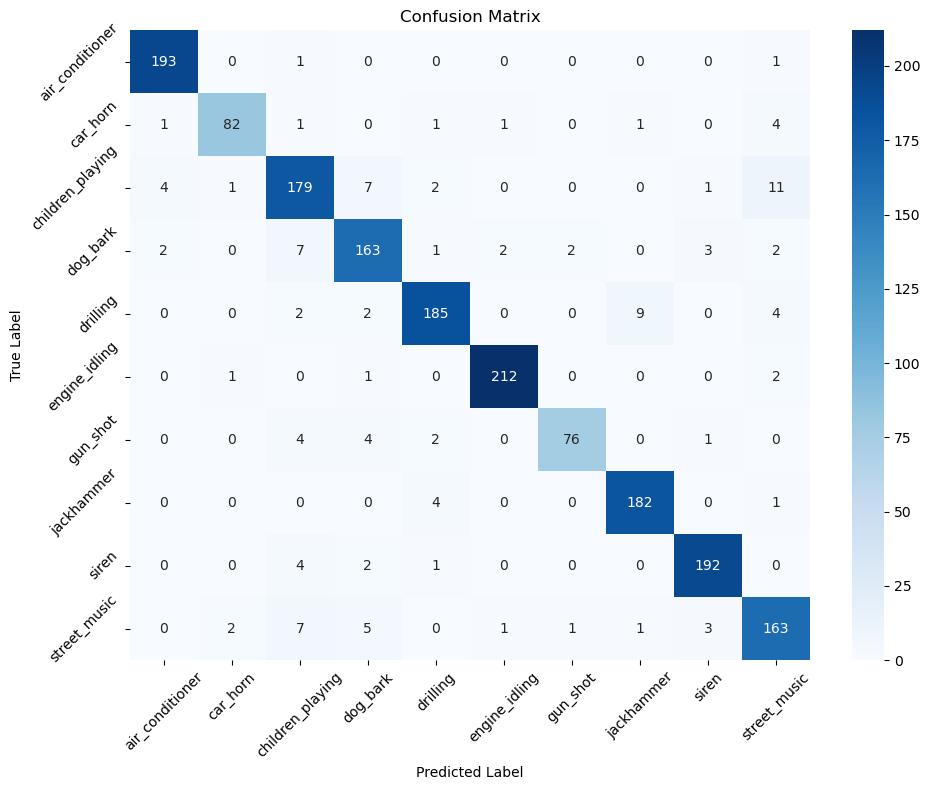

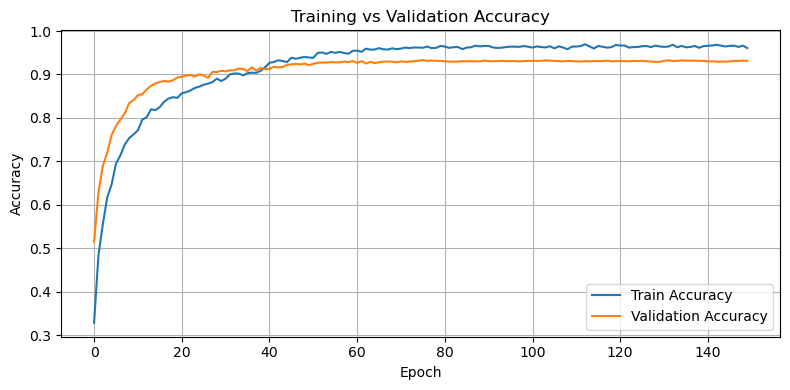

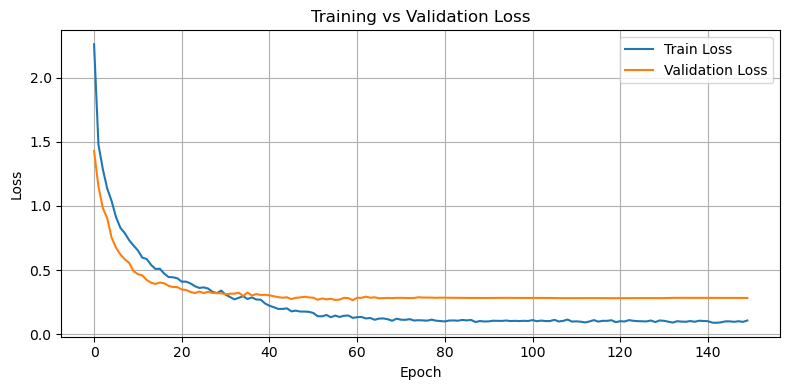

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# UrbanSound8K class names
class_names = [
    "air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling",
    "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"
]

# 🔮 Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 📉 Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# 🎯 Macro averages
macro_accuracy = accuracy_score(y_true, y_pred_classes)
macro_precision = precision_score(y_true, y_pred_classes, average='macro')
macro_recall = recall_score(y_true, y_pred_classes, average='macro')
macro_f1 = f1_score(y_true, y_pred_classes, average='macro')

# 🧠 Per-class metrics
sensitivity_per_class = recall_score(y_true, y_pred_classes, average=None)
precision_per_class = precision_score(y_true, y_pred_classes, average=None)
f1_per_class = f1_score(y_true, y_pred_classes, average=None)
accuracy_per_class = []
specificity_per_class = []

for i in range(len(class_names)):
    tp = cm[i][i]
    fn = np.sum(cm[i]) - tp
    fp = np.sum(cm[:, i]) - tp
    tn = np.sum(cm) - (tp + fn + fp)
    
    acc = (tp + tn) / np.sum(cm) if np.sum(cm) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    accuracy_per_class.append(acc)
    specificity_per_class.append(specificity)

# 🔍 Print per-class metrics
print("\n🔎 Per-Class Evaluation Metrics:")
print(f"{'Class Name':20s} {'Accuracy':>9} {'Sensitivity':>12} {'Specificity':>12} {'Precision':>10} {'F1 Score':>10}")
print("-" * 75)
for i, name in enumerate(class_names):
    print(f"{name:20s} {accuracy_per_class[i]:9.4f} {sensitivity_per_class[i]:12.4f} {specificity_per_class[i]:12.4f} {precision_per_class[i]:10.4f} {f1_per_class[i]:10.4f}")

# 🔁 Macro scores
print("\n📊 Macro Evaluation Scores:")
print(f"Accuracy (overall)     : {macro_accuracy:.4f}")
print(f"Macro Sensitivity      : {macro_recall:.4f}")
print(f"Macro Specificity      : {np.mean(specificity_per_class):.4f}")
print(f"Macro Precision        : {macro_precision:.4f}")
print(f"Macro F1 Score         : {macro_f1:.4f}")

# 📊 Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Plotting Accuracy & Loss Graphs
# Make sure you used `history = model.fit(...)` while training

# ✅ Accuracy Graph
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ❌ Loss Graph
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
y_pred = model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


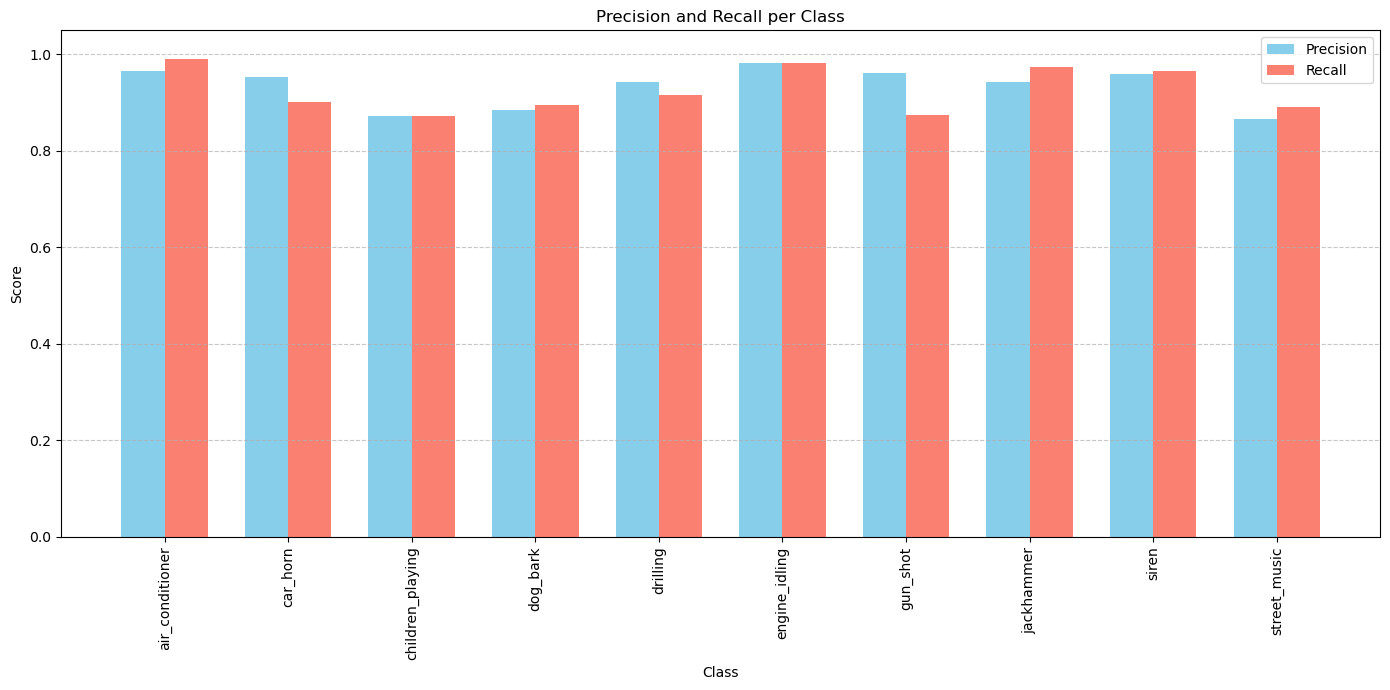

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import label_binarize

# Get true and predicted labels
y_true = y_test  # one-hot encoded
y_scores = y_pred  # model output (probabilities)

# Convert one-hot to class indices
y_true_class = np.argmax(y_true, axis=1)
y_pred_class = np.argmax(y_scores, axis=1)

# Get class names
class_names = labelencoder.classes_

# Calculate precision and recall for each class
precision = precision_score(y_true_class, y_pred_class, average=None)
recall = recall_score(y_true_class, y_pred_class, average=None)

# Plot bar chart
x = np.arange(len(class_names))  # label locations
width = 0.35  # width of bars

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, precision, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall, width, label='Recall', color='salmon')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision and Recall per Class')
plt.xticks(x, class_names, rotation=90)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()